# Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn import svm

In [3]:
from sklearn.metrics import classification_report

https://www.kaggle.com/competitions/titanic/data

In [4]:
# Reading data from filestorage
df = pd.read_csv('./titanic/train.csv')

In [5]:
# Reading test data from filestorage
df_test = pd.read_csv('./titanic/test.csv')

Top 5 row is both csv files

In [6]:
df['Name'].apply(lambda x:x.split()[2])

0           Owen
1           John
2          Laina
3        Jacques
4        William
         ...    
886       Juozas
887     Margaret
888    Catherine
889         Karl
890      Patrick
Name: Name, Length: 891, dtype: object

In [7]:
mask = df['Name'].apply(lambda x:x.split()[2]) == 'Jack'
df[mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [8]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
df['Fare'].nunique()

248

<AxesSubplot:ylabel='Frequency'>

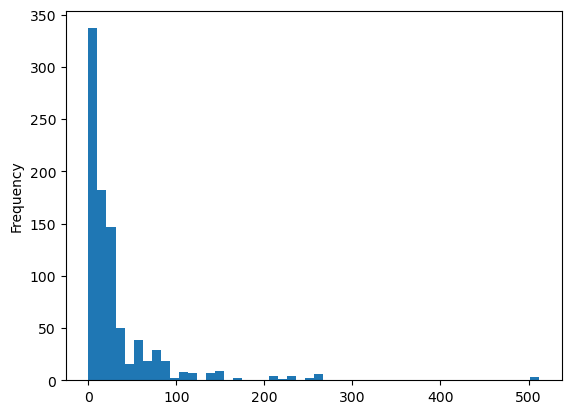

In [11]:
# vizualizing Ticket fare to check whether it is a categorical variable or numerical
df['Fare'].plot(kind='hist',bins=50)

## Training and test set size

In [12]:
len(df)

891

In [13]:
len(df_test)

418

# Selecting features

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df['Cabin'].nunique()

147

In [16]:
mean = df['Age'].mean()
mean

29.69911764705882

In [17]:
df['Age'].fillna(mean,inplace=True)

In [18]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
df['Embarked'].fillna('S',inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Splitting the columns to get images and labels seperated

In [21]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

le_embarked = LabelEncoder()
le_sex = LabelEncoder()

df['Embarked_le'] = le_embarked.fit_transform(df['Embarked'])
df['Sex_le'] = le_sex.fit_transform(df['Sex'])

In [22]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
df['Embarked_le'].value_counts()

2    646
0    168
1     77
Name: Embarked_le, dtype: int64

In [24]:
sel_cols = ['Pclass', 'Sex_le', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_le']

In [25]:
df[sel_cols].head(3)

,Pclass,Sex_le,Age,SibSp,Parch,Fare,Embarked_le
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2


In [26]:
X_all = df[sel_cols].copy()
y_all = df['Survived'].values.ravel().copy()

In [27]:
X, X_test, y, y_test = train_test_split(
    X_all, y_all, test_size=0.33, random_state=42)

In [29]:
svm.SVC

sklearn.svm._classes.SVC

In [30]:
C = [
    0.1,
    1,
    100
    ]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    for c in C:
        clf = svm.SVC(kernel=kernel, C=c)
        # Fitting data into model
        clf.fit(X, y)
        preds = clf.predict(X_test)
        
        print('Kernel :',kernel)
        print('C :',c)
        print('Acc :', np.sum(y_test==preds)/len(preds))

Kernel : linear
C : 0.1
Acc : 0.7966101694915254
Kernel : linear
C : 1
Acc : 0.7966101694915254
Kernel : linear
C : 100
Acc : 0.7932203389830509
Kernel : poly
C : 0.1
Acc : 0.6033898305084746
Kernel : poly
C : 1
Acc : 0.6169491525423729
Kernel : poly
C : 100
Acc : 0.6847457627118644
Kernel : rbf
C : 0.1
Acc : 0.6677966101694915
Kernel : rbf
C : 1
Acc : 0.6644067796610169
Kernel : rbf
C : 100
Acc : 0.7864406779661017
Kernel : sigmoid
C : 0.1
Acc : 0.5932203389830508
Kernel : sigmoid
C : 1
Acc : 0.6
Kernel : sigmoid
C : 100
Acc : 0.5796610169491525


In [30]:
%%time

clf = svm.SVC(C=1)
clf.fit(X, y)

CPU times: total: 0 ns
Wall time: 17 ms


SVC(C=1)

In [31]:
preds = clf.predict(X_test)

In [32]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.65      0.94      0.77       175
           1       0.74      0.27      0.39       120

    accuracy                           0.66       295
   macro avg       0.70      0.60      0.58       295
weighted avg       0.69      0.66      0.62       295



# K Nearest Neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
%%time
p = [1,2]
neighbors = [1,2,3,5,7,9,15]

for p_value in p:
    for neighbor in neighbors:
        nn = KNeighborsClassifier(n_neighbors=5)
        nn.fit(X,y)
        nn_preds = nn.predict(X_test)
        print('P:',p_value)
        print('Neighbors :',neighbor)
        print('Acc :', np.sum(y_test==nn_preds)/len(nn_preds))

P: 1
Neighbors : 1
Acc : 0.7084745762711865
P: 1
Neighbors : 2
Acc : 0.7084745762711865
P: 1
Neighbors : 3
Acc : 0.7084745762711865
P: 1
Neighbors : 5
Acc : 0.7084745762711865
P: 1
Neighbors : 7
Acc : 0.7084745762711865
P: 1
Neighbors : 9
Acc : 0.7084745762711865
P: 1
Neighbors : 15
Acc : 0.7084745762711865
P: 2
Neighbors : 1
Acc : 0.7084745762711865
P: 2
Neighbors : 2
Acc : 0.7084745762711865
P: 2
Neighbors : 3
Acc : 0.7084745762711865
P: 2
Neighbors : 5
Acc : 0.7084745762711865
P: 2
Neighbors : 7
Acc : 0.7084745762711865
P: 2
Neighbors : 9
Acc : 0.7084745762711865
P: 2
Neighbors : 15
Acc : 0.7084745762711865
CPU times: total: 109 ms
Wall time: 153 ms


In [ ]:
%%time

nn = KNeighborsClassifier(n_neighbors=5)

In [35]:
nn.fit(X,y)

KNeighborsClassifier()

In [36]:
%%time

nn_preds = nn.predict(X_test)

CPU times: total: 15.6 ms
Wall time: 15.1 ms


In [37]:
print(classification_report(y_test,nn_preds))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       175
           1       0.67      0.56      0.61       120

    accuracy                           0.71       295
   macro avg       0.70      0.68      0.69       295
weighted avg       0.70      0.71      0.70       295



# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dct = DecisionTreeClassifier()

In [41]:
%%time

dct.fit(X,y)

CPU times: total: 0 ns
Wall time: 0 ns


DecisionTreeClassifier()

In [42]:
%%time

dct_preds = dct.predict(X_test)

CPU times: total: 0 ns
Wall time: 0 ns


In [43]:
print(classification_report(y_test,dct_preds))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       175
           1       0.69      0.69      0.69       120

    accuracy                           0.75       295
   macro avg       0.74      0.74      0.74       295
weighted avg       0.75      0.75      0.75       295



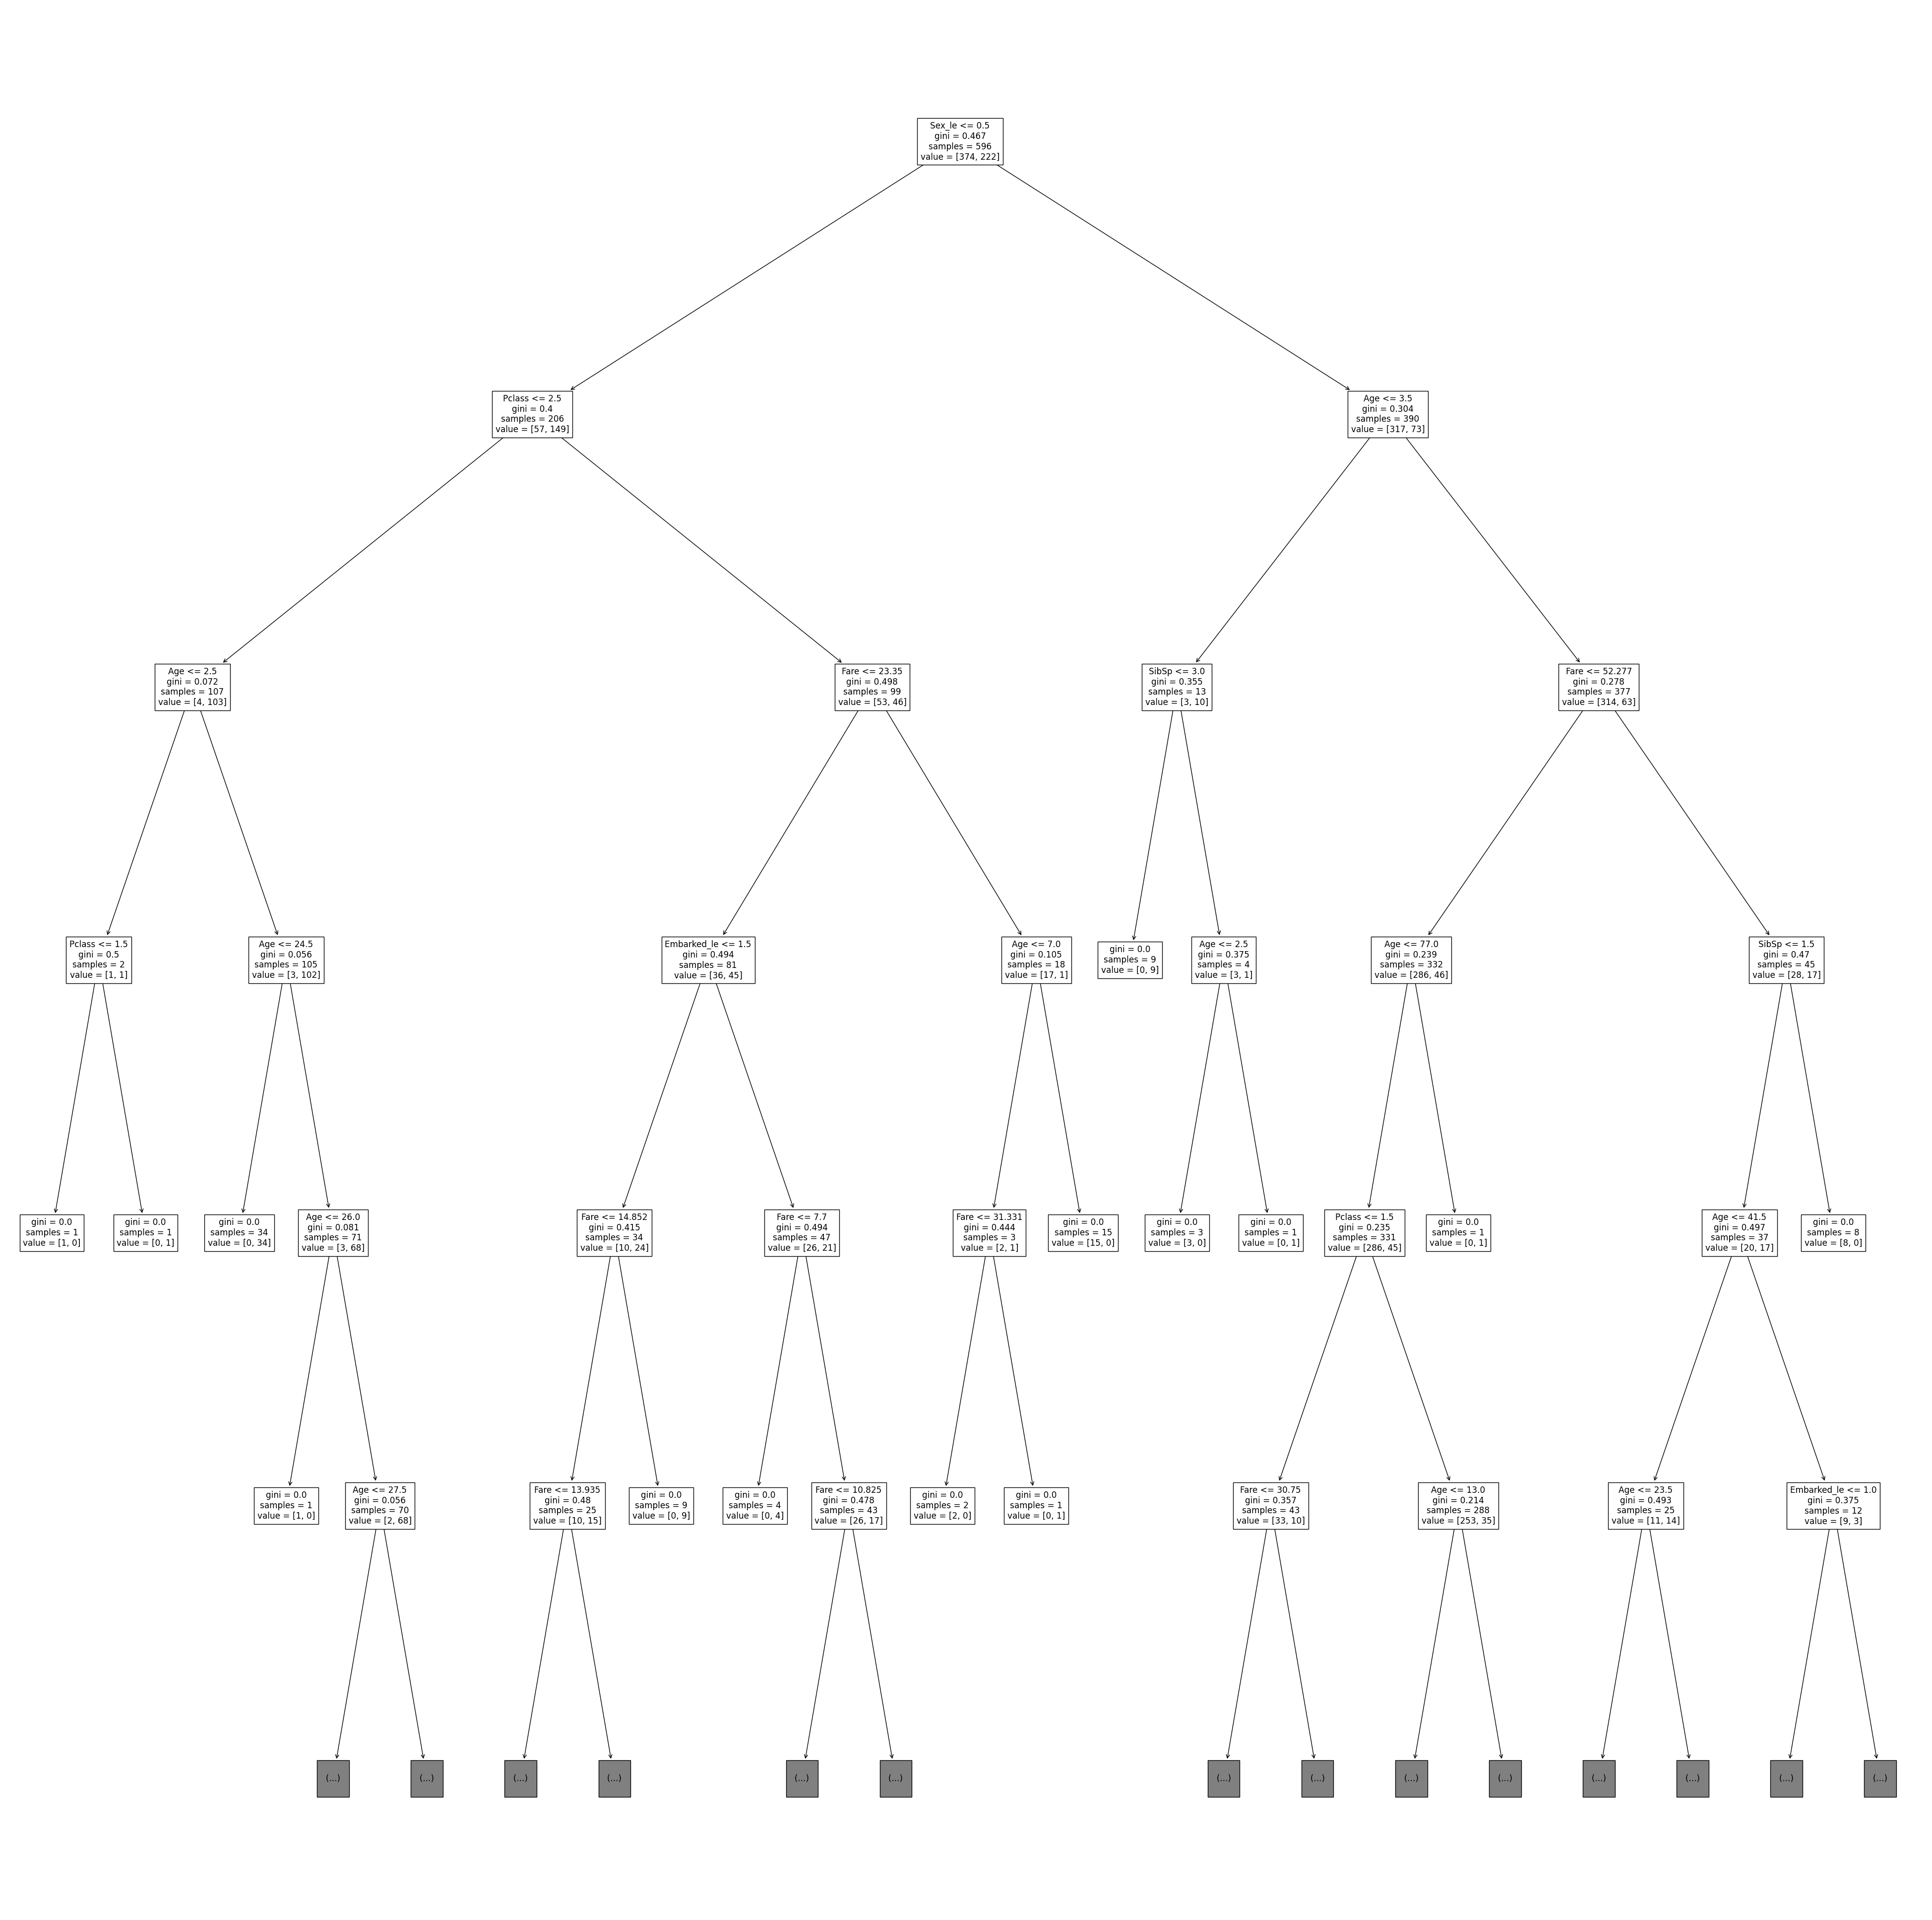

In [44]:
from sklearn import tree

plt.figure(figsize=(50,50))
tree.plot_tree(dct,feature_names=sel_cols,max_depth=5)
plt.show()